------------


## Separación de digitos de varios modelos.

Usando mnist como dataset
Encontrados 6 pares de modelos.

🧩 Cargando modelos para configuración: 128_lat_2_mnist.keras

✅ Modelo '128_lat_2_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 128_lat_64_mnist.keras
✅ Modelo '128_lat_64_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 128_lat_64_mnist_beta_10.keras
✅ Modelo '128_lat_64_mnist_beta_10.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_128_mnist.keras
✅ Modelo '256_lat_128_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_64_mnist.keras
✅ Modelo '256_lat_64_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 512_lat_256_mnist.keras
✅ Modelo '512_lat_256_mnist.keras' procesado.


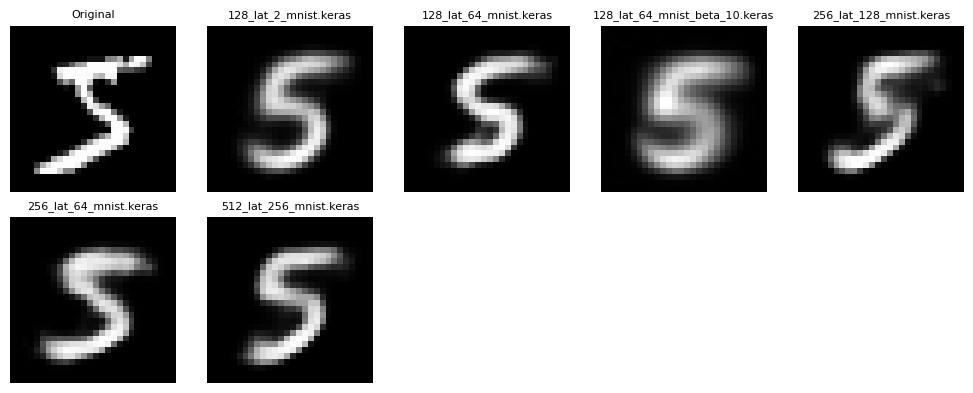

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Agregar carpeta raíz al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

# Importar módulos propios
from Datos.Data_acq import get_mnist_data
from models.cVAE import CVAE
from custom_layers.Sampling import Sampling

# Cargar datos
x_train, x_test, x_val, y_train, y_test, y_val, x_train_1, y_train_1 = get_mnist_data()

# Rutas a los modelos
ENCODER_DIR = "../../modelos_entrenados/encoders/"
DECODER_DIR = "../../modelos_entrenados/decoders/"
ORIGINAL_DIM = 28 * 28

# Obtener listas de archivos
encoder_files = sorted(os.listdir(ENCODER_DIR))
decoder_files = sorted(os.listdir(DECODER_DIR))

# Función para extraer clave
def get_key(filename):
    return "_".join(filename.split("_")[2:])  # ej: 'lat_2_mnist.keras'

# Crear diccionarios clave → path
encoders = {get_key(f): os.path.join(ENCODER_DIR, f) for f in encoder_files if f.endswith(".keras")}
decoders = {get_key(f): os.path.join(DECODER_DIR, f) for f in decoder_files if f.endswith(".keras")}

# Claves comunes entre encoder y decoder
common_keys = sorted(set(encoders.keys()) & set(decoders.keys()))
print(f"Encontrados {len(common_keys)} pares de modelos.")

# Imagen original
x_input = x_train[:1]         # Imagen original
cond_input = y_train[:1]      # Condición
original_image = x_input[0].reshape(28, 28)

# Guardar imágenes reconstruidas + nombres
reconstructed_images = [original_image]
model_names = ["Original"]

# Iterar sobre modelos
for key in common_keys:
    print(f"\n🧩 Cargando modelos para configuración: {key}")
    
    encoder_path = encoders[key]
    decoder_path = decoders[key]
    
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    cvae = CVAE(encoder, decoder, original_dim=ORIGINAL_DIM)
    cvae.compile(optimizer="adam")

    # Codificar y decodificar
    z_mean, z_log_var, z = cvae.encoder.predict([x_input, cond_input],verbose=0)
    reconstructed = cvae.decoder.predict([z, cond_input],verbose=0)

    # Guardar imagen
    reconstructed_images.append(reconstructed[0].reshape(28, 28))
    model_names.append(key)

    print(f"✅ Modelo '{key}' procesado.")

# Mostrar todas las imágenes en una sola figura
num_images = len(reconstructed_images)
cols = min(5, num_images)
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))

for i, (img, name) in enumerate(zip(reconstructed_images, model_names)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


Usando mnist como dataset
Encontrados 6 pares de modelos.

🧩 Cargando modelos para configuración: 128_lat_2_mnist.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
select_1:       tf.Tensor([0 1 1 1 0 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 0 0 0 1 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor(

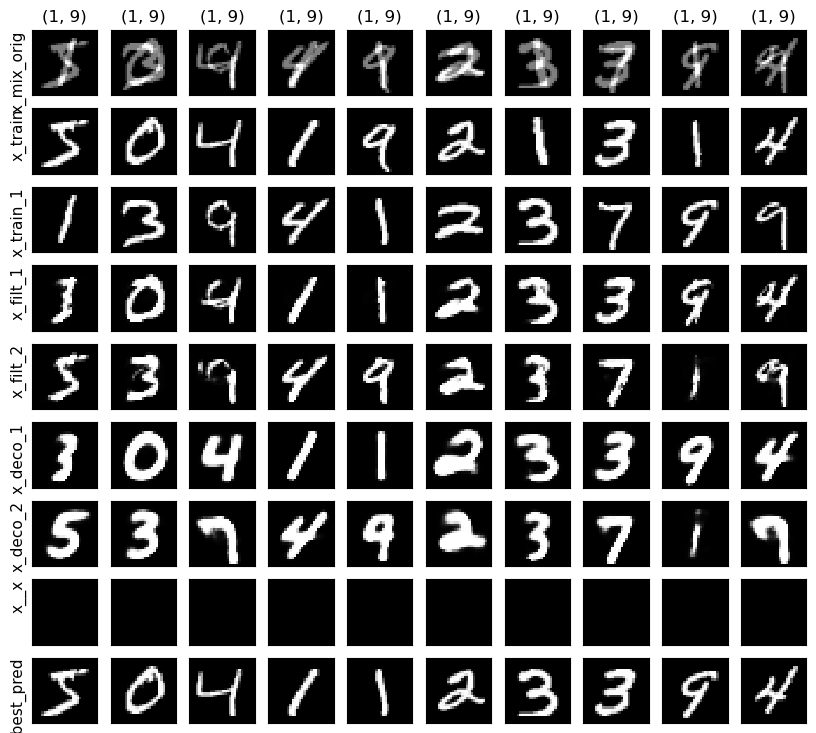

✅ Modelo '128_lat_2_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 128_lat_64_mnist.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
select_1:       tf.Tensor([0 0 0 1 0 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 1 1 0 1 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([0 0 0 1 0 

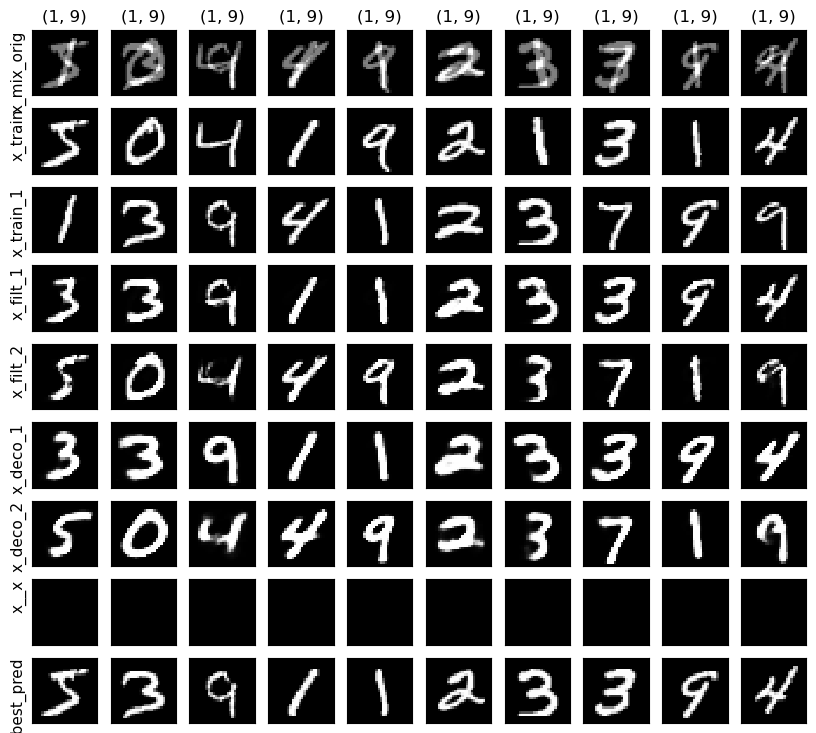

✅ Modelo '128_lat_64_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 128_lat_64_mnist_beta_10.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
select_1:       tf.Tensor([0 0 1 1 0 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 1 0 0 1 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([0 0

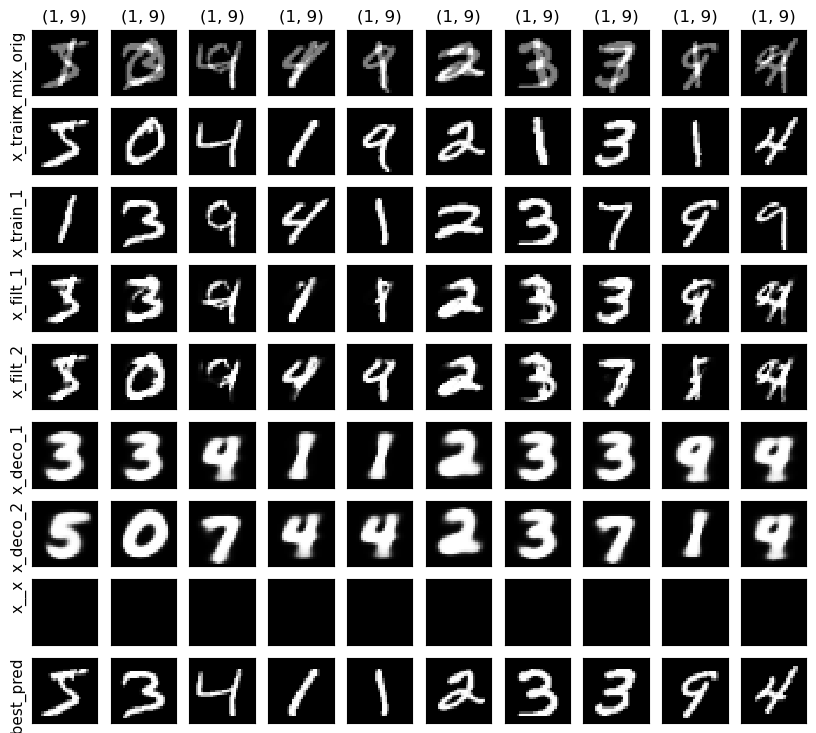

✅ Modelo '128_lat_64_mnist_beta_10.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_128_mnist.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
select_1:       tf.Tensor([0 0 0 1 0 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 1 1 0 1 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([0 

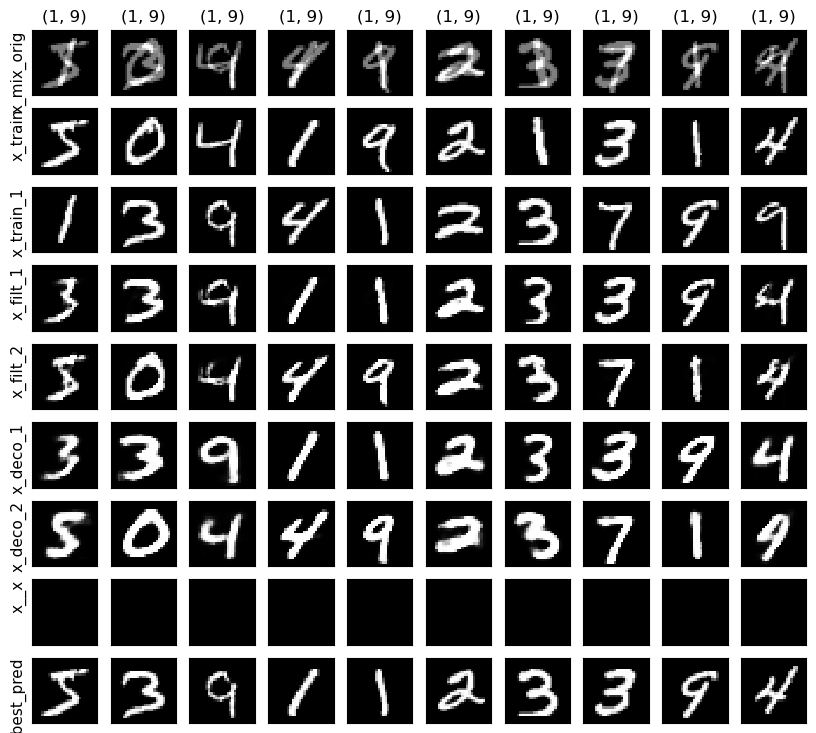

✅ Modelo '256_lat_128_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_64_mnist.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
select_1:       tf.Tensor([0 0 1 1 1 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 1 0 0 0 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([0 0 4 1 9 

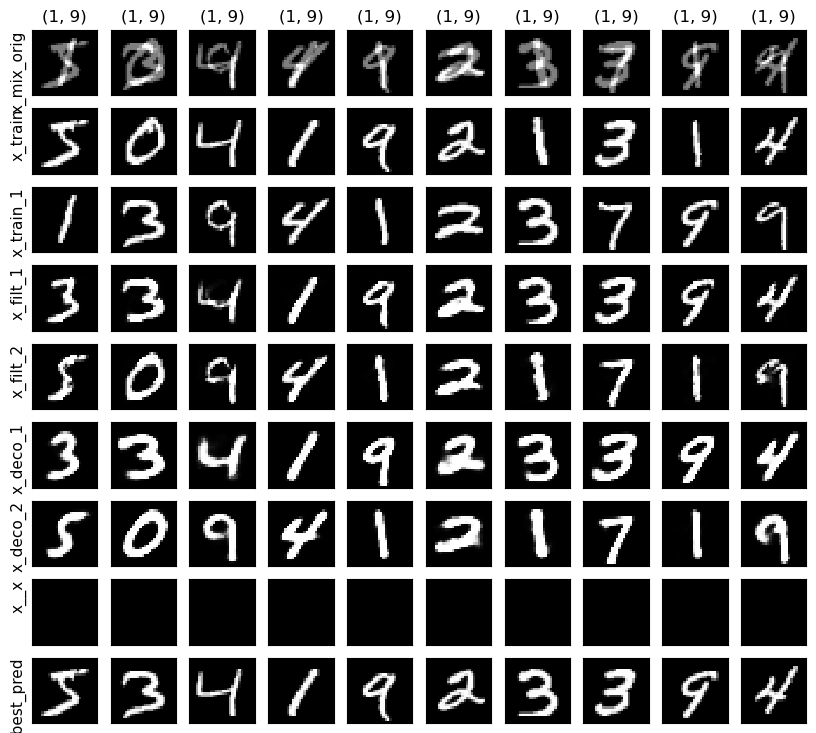

✅ Modelo '256_lat_64_mnist.keras' procesado.

🧩 Cargando modelos para configuración: 512_lat_256_mnist.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
select_1:       tf.Tensor([0 0 1 0 1 1 0 1 0 1], shape=(10,), dtype=int64)
select_1_1:     tf.Tensor([0 1 0 1 0 1 1 0 1 0], shape=(10,), dtype=int64)
################################################################################################
formas de x y select_1 

(10, 784)
(10, 784)
(10, 1)
(10, 1)
################################################################################################
y_reduced:    tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=int64)
y_1_reduced:  tf.Tensor([1 3 9 4 1 2 3 7 9 9], shape=(10,), dtype=int64)
y_s1:          tf.Tensor([0 0 4 0 9 

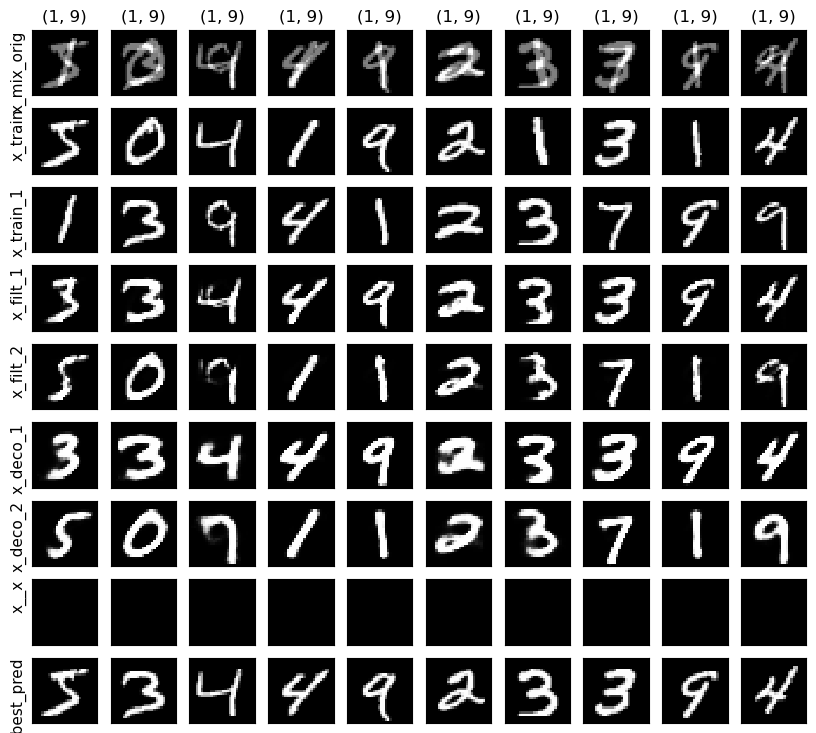

✅ Modelo '512_lat_256_mnist.keras' procesado.


In [2]:

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# Agregar carpeta raíz al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from tensorflow.keras.models import load_model


# Importar módulos propios
from Datos.Data_acq import get_mnist_data
from models.cVAE import CVAE
from custom_layers.Sampling import Sampling


import inferencias.inferencia as inf
import importlib
from custom_layers.ReshapeLayer import ReshapeLayer
importlib.reload(inf)


# Cargar datos
x_train, x_test, x_val, y_train, y_test, y_val, x_train_1, y_train_1 = get_mnist_data()

# Rutas a los modelos
ENCODER_DIR = "../../modelos_entrenados/encoders/"
DECODER_DIR = "../../modelos_entrenados/decoders/"
ORIGINAL_DIM = 28 * 28

# Obtener listas de archivos
encoder_files = sorted(os.listdir(ENCODER_DIR))
decoder_files = sorted(os.listdir(DECODER_DIR))

# Función para extraer clave
def get_key(filename):
    return "_".join(filename.split("_")[2:])  # ej: 'lat_2_mnist.keras'

# Crear diccionarios clave → path
encoders = {get_key(f): os.path.join(ENCODER_DIR, f) for f in encoder_files if f.endswith(".keras")}
decoders = {get_key(f): os.path.join(DECODER_DIR, f) for f in decoder_files if f.endswith(".keras")}

# Claves comunes entre encoder y decoder
common_keys = sorted(set(encoders.keys()) & set(decoders.keys()))
print(f"Encontrados {len(common_keys)} pares de modelos.")


predictor = load_model("../../modelos_entrenados/predictores/CCE_Conv2D.keras", custom_objects={"ReshapeLayer": ReshapeLayer})

modelos = []
bpsnr_mean_total =[]
kl_loss = []
reconstruction_loss = []
loss_total = [] 
# Iterar sobre modelos
for key in common_keys:
    print(f"\n🧩 Cargando modelos para configuración: {key}")
    
    modelos.append(str(key))
    
    encoder_path = encoders[key]
    decoder_path = decoders[key]
    
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    cvae = CVAE(encoder, decoder, original_dim=ORIGINAL_DIM)
    cvae.compile(optimizer="adam")


    n_pictures=10

    bpsnr_mean_total.append(inf.separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                y_train_1[0:n_pictures],cvae,predictor,num_col=n_pictures,show_graph=True,show_laten=False,Iterations=5 ))

    loss_total.append( cvae.total_loss_tracker.result())
    reconstruction_loss.append(cvae.reconstruction_loss_tracker.result())
    kl_loss.append(cvae.kl_loss_tracker.result())


    print(f"✅ Modelo '{key}' procesado.")





In [4]:
for m, e in zip(modelos,bpsnr_mean_total):
    print(f"{m}:  {e[0]}   y {e[1]} \n")

128_lat_2_mnist.keras:  15.899566650390625   y 2.4701461791992188 

128_lat_64_mnist.keras:  17.444019317626953   y 3.2465217113494873 

128_lat_64_mnist_beta_10.keras:  14.297595024108887   y 1.400007724761963 

256_lat_128_mnist.keras:  17.02773666381836   y 3.0808258056640625 

256_lat_64_mnist.keras:  18.23044776916504   y 2.561748743057251 

512_lat_256_mnist.keras:  17.226173400878906   y 3.2626283168792725 



en cuanto a metricas, los modelos dan valores de error promedio muy similiares.

## Pruebas con modelos entrenados con fashion

Usando fashion como dataset
Encontrados 5 pares de modelos.

🧩 Cargando modelos para configuración: 1024_lat_256_fashion.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
tf.Tensor(
[19.604427 20.396614 11.811242  8.049636 16.855774 14.550125 15.099574
 20.294031  5.858728  8.435672], shape=(10,), dtype=float32)
tf.Tensor(
[14.065483  14.251148  13.359423   9.661156  15.667921  12.84271
 11.913693   9.93608    6.4939265  8.348069 ], shape=(10,), dtype=float32)
tf.Tensor(
[16.834955  17.323881  12.585333   8.855396  16.261848  13.696417
 13.506634  15.115055   6.176327   8.3918705], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.15899    5.6002393 14.922387   9.515653   8.702515   6.4557796
 17.36589    6.354283  16.853409  15.479053 ]

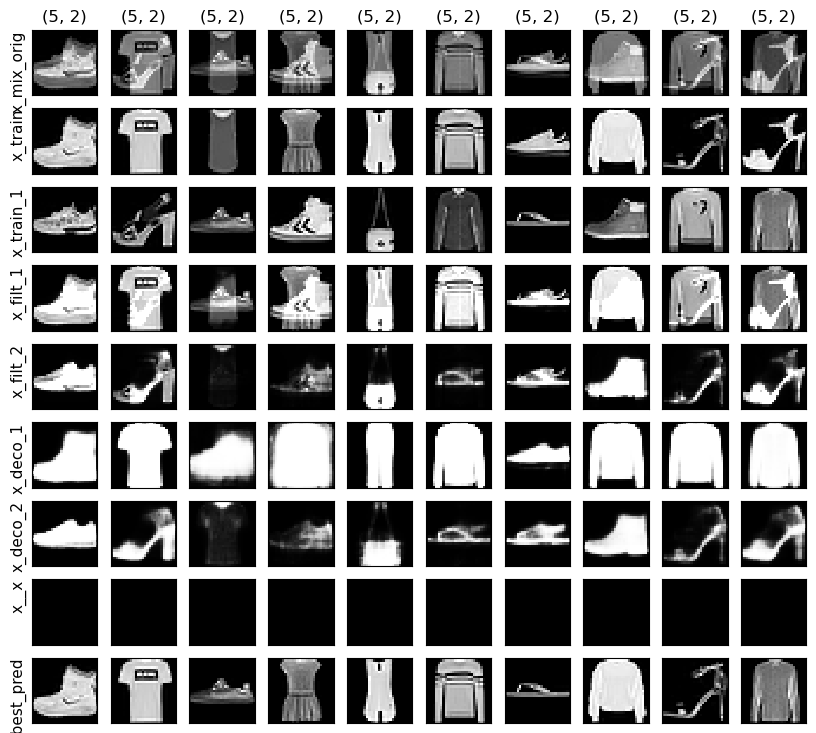

✅ Modelo '1024_lat_256_fashion.keras' procesado.

🧩 Cargando modelos para configuración: 128_lat_2_fashion.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
tf.Tensor(
[16.141602  19.657112  11.973473   6.5105124 17.900103  14.531884
 19.043823  20.274988   5.893015   8.434582 ], shape=(10,), dtype=float32)
tf.Tensor(
[13.823568  12.216686  13.269352   7.9003825 14.028253  13.302198
 15.344884  10.538894   6.446144   8.629256 ], shape=(10,), dtype=float32)
tf.Tensor(
[14.982585  15.936899  12.621412   7.205447  15.964178  13.917042
 17.194353  15.40694    6.1695795  8.5319195], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.034921   6.0577207 21.141048  12.037376  10.116407   6.0855575
 12.545217   5.9694695 16.154259  13.531776 ], sh

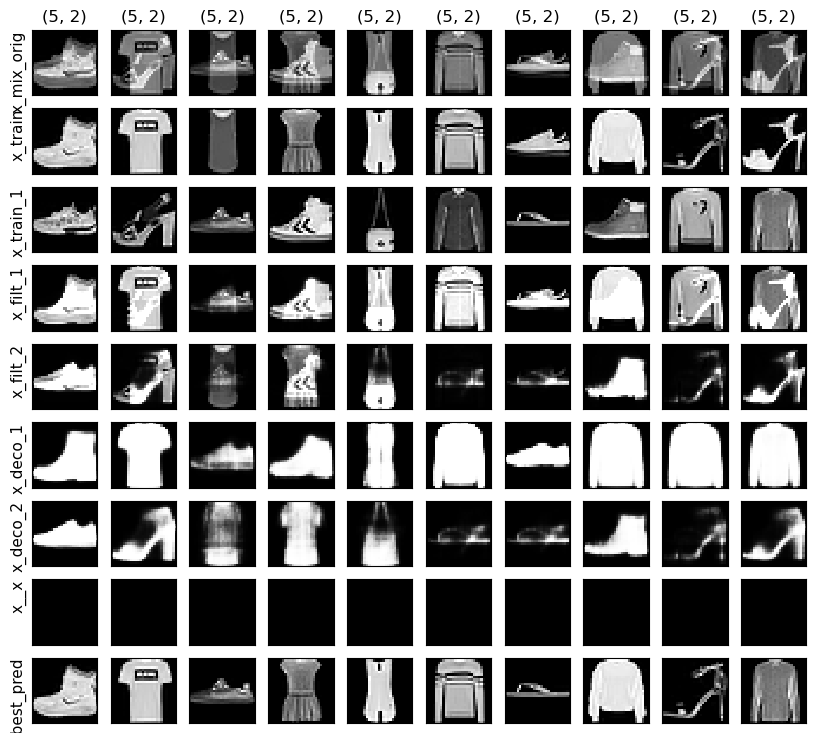

✅ Modelo '128_lat_2_fashion.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_128_fashion.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
tf.Tensor(
[17.017052  19.68716   11.166837   6.632328  18.25342   14.494223
 19.333351  20.573416   5.8563447  8.398342 ], shape=(10,), dtype=float32)
tf.Tensor(
[13.665075  13.813994  13.218027   7.3407426 15.034498  13.517474
 16.504194  10.584058   6.029408   9.064636 ], shape=(10,), dtype=float32)
tf.Tensor(
[15.3410635 16.750578  12.192432   6.986535  16.643959  14.005848
 17.918774  15.578737   5.9428763  8.731489 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 7.9979444  5.943627  20.619753  12.063149   9.580523   5.767593
 10.899766   6.055605  14.257339  12.683792 ], shap

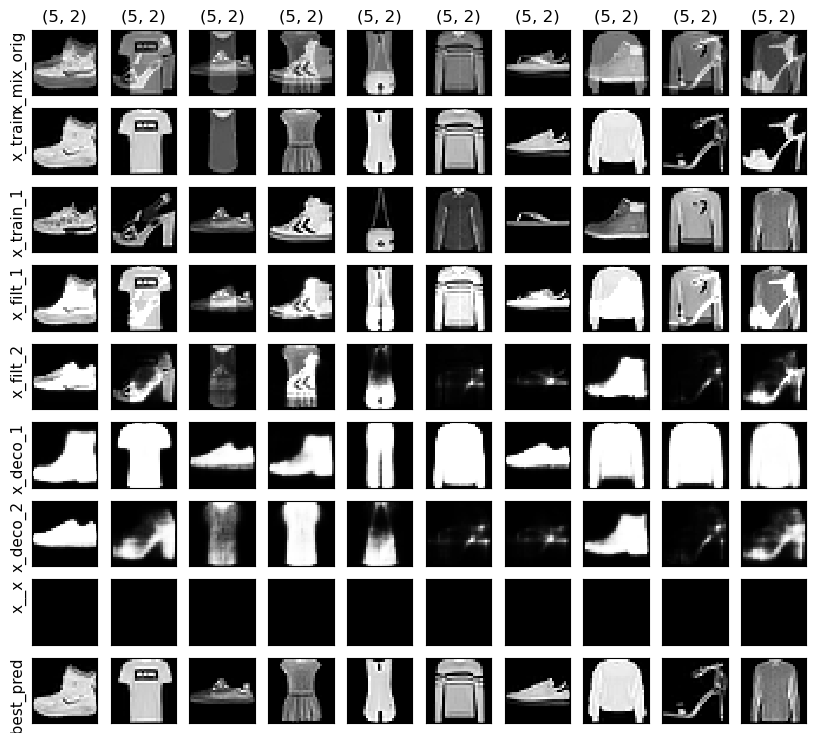

✅ Modelo '256_lat_128_fashion.keras' procesado.

🧩 Cargando modelos para configuración: 256_lat_64_fashion.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
tf.Tensor(
[18.435604  18.291798  11.396507   8.079106  18.504627  14.647131
 19.785934  20.988558   5.8444576  8.193306 ], shape=(10,), dtype=float32)
tf.Tensor(
[13.53809  13.377398 13.2567   10.297267 15.996548 13.819291 16.235899
 10.16852   6.31787   8.204969], shape=(10,), dtype=float32)
tf.Tensor(
[15.986847  15.834598  12.326603   9.188187  17.250587  14.2332115
 18.010918  15.578539   6.081164   8.199138 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.33457    5.5505757 20.028233   9.1647005  8.717366   6.2260785
 12.734803   6.0939903 15.023821  15.421811 ], shape=(10,

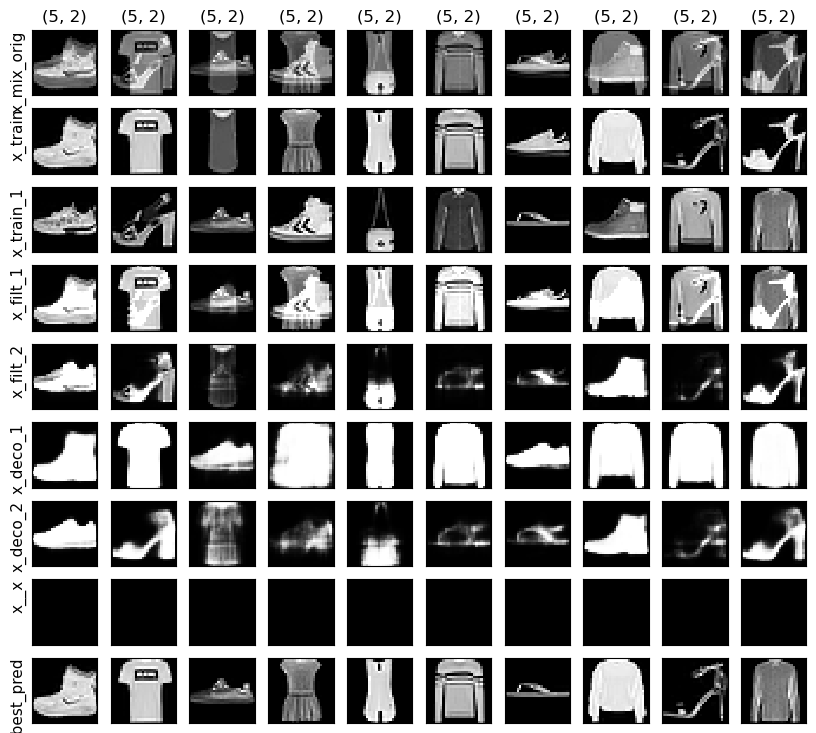

✅ Modelo '256_lat_64_fashion.keras' procesado.

🧩 Cargando modelos para configuración: 512_lat_128_fashion.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
tf.Tensor(
[19.494959  21.485168  13.733121   8.4586115 15.45062   14.531366
 18.783056  18.818415   5.8578224  8.261205 ], shape=(10,), dtype=float32)
tf.Tensor(
[13.727953 14.375204 14.664239 10.07491  16.19262  13.859974 16.55843
  9.999724  6.45231   8.285271], shape=(10,), dtype=float32)
tf.Tensor(
[16.611456  17.930187  14.19868    9.266761  15.821619  14.19567
 17.670742  14.409069   6.1550665  8.273237 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.189274   5.483235  12.421115   9.254449   8.53535    5.8577456
 13.325761   6.2041526 16.451939  15.361957 ], shape=(10,), 

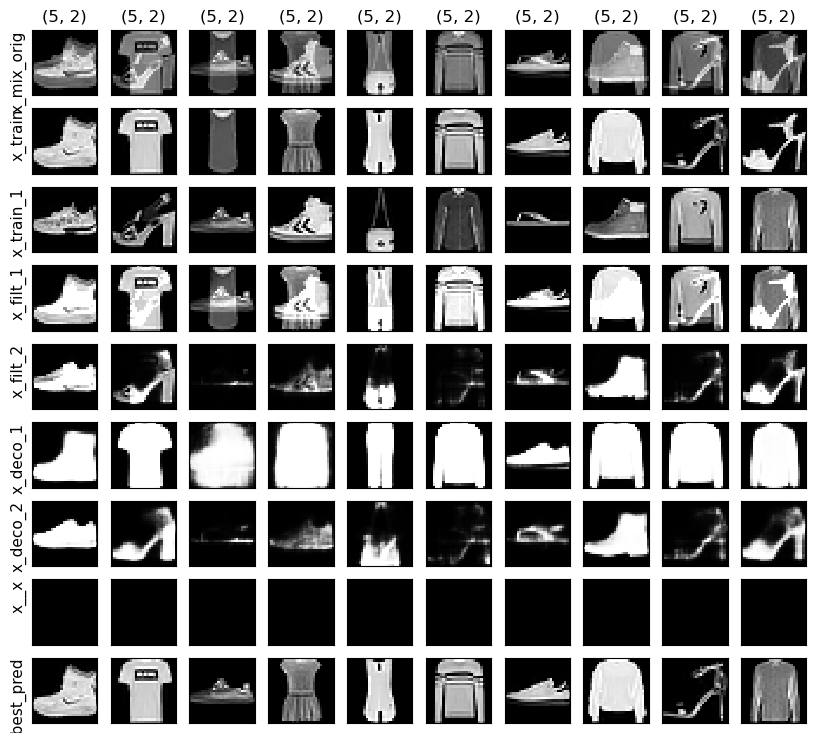

✅ Modelo '512_lat_128_fashion.keras' procesado.


In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
# Agregar carpeta raíz al path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from tensorflow.keras.models import load_model


# Importar módulos propios
from Datos.Data_acq import get_mnist_data
from models.cVAE import CVAE
from custom_layers.Sampling import Sampling


import inferencias.inferencia as inf
import importlib
from custom_layers.ReshapeLayer import ReshapeLayer
importlib.reload(inf)


# Cargar datos
x_train, x_test, x_val, y_train, y_test, y_val, x_train_1, y_train_1 = get_mnist_data(dataset="fashion")

predictor = load_model("../../modelos_entrenados/predictores/CCE_Conv2D_fashion.keras", custom_objects={"ReshapeLayer": ReshapeLayer})



# Rutas a los modelos
ENCODER_DIR = "../../modelos_entrenados/enconders_fashion/"
DECODER_DIR = "../../modelos_entrenados/decoders_fashion/"
ORIGINAL_DIM = 28 * 28

# Obtener listas de archivos
encoder_files = sorted(os.listdir(ENCODER_DIR))
decoder_files = sorted(os.listdir(DECODER_DIR))

# Función para extraer clave
def get_key(filename):
    return "_".join(filename.split("_")[2:]) 

# Crear diccionarios clave → path
encoders = {get_key(f): os.path.join(ENCODER_DIR, f) for f in encoder_files if f.endswith(".keras")}
decoders = {get_key(f): os.path.join(DECODER_DIR, f) for f in decoder_files if f.endswith(".keras")}

# Claves comunes entre encoder y decoder
common_keys = sorted(set(encoders.keys()) & set(decoders.keys()))
print(f"Encontrados {len(common_keys)} pares de modelos.")


# Iterar sobre modelos
for key in common_keys:
    print(f"\n🧩 Cargando modelos para configuración: {key}")
    

    encoder_path = encoders[key]
    decoder_path = decoders[key]
    
    encoder = load_model(encoder_path, custom_objects={"Sampling": Sampling})
    decoder = load_model(decoder_path)

    cvae = CVAE(encoder, decoder, original_dim=ORIGINAL_DIM)
    cvae.compile(optimizer="adam")


    n_pictures=10

    bpsnr_mean_total.append(inf.separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                y_train_1[0:n_pictures],cvae,predictor,num_col=n_pictures,show_graph=True,show_laten=False,Iterations=5 ))


    print(f"✅ Modelo '{key}' procesado.")



